# **K-Nearest Neighbors Application**

In this project, the K-Nearest Neighbors (KNN) algorithm is applied to classify breast cancer data. The dataset is first standardized and reduced to two principal components using PCA to visualize it in 2D. A custom KNN algorithm is implemented from scratch, where the Euclidean distance is used to find the k nearest neighbors for each test point. The most common label among these neighbors is selected as the predicted class for each test point. After splitting the data into training and testing sets, the KNN algorithm is run for different values of k, and the decision boundary is plotted along with the data points. The performance of the model is evaluated based on accuracy and model complexity based on different values of k.

### Import Statements:

* Counter: A subclass of Python's dictionary used for counting hashable objects.
* numpy: Used for numerical operations.
* load_breast_cancer: Function to load the breast cancer dataset from sklearn.
* matplotlib.pyplot: For data visualization.

In [1]:
from collections import Counter
import numpy as np
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt

### Load Dataset:

The breast cancer dataset is loaded, containing features (breast_data) and labels (breast_target).

In [2]:
breast = load_breast_cancer()
breast_data = breast.data
breast_target = breast.target

### Data Standardization:

This function standardizes the dataset by subtracting the mean and dividing by the standard deviation for each feature. This ensures that all features have a mean of 0 and variance of 1.

In [3]:
def standardize_data(X):
    mean_X = np.mean(X, axis=0)
    std_dev = np.std(X, axis=0)
    X_standardized = (X - mean_X) / std_dev
    return X_standardized

### Perform PCA:

* Centers the data by subtracting the mean.
* Computes the covariance matrix.
* Finds the eigenvalues and eigenvectors, sorting them in decreasing order.
* Projects the data onto the top n_components principal components (2 in this case).

In [12]:
def perfom_pca(data, n_components):
    
    # Standardize the data (center the data)
    mean_vector = np.mean(data, axis=0)
    mean_matrix = np.repeat(mean_vector, len(data))
    mean_matrix = mean_matrix.reshape(data.shape, order="F")
    centered_data = data - mean_matrix

    # Compute the covariance matrix
    cov_matrix = (np.dot(centered_data.T, centered_data)) / (len(centered_data) - 1)

    # Compute the eigenvectors and eigenvalues and Sort them
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
    sorted_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]

    # Project the data onto the new feature space
    projection_matrix = sorted_eigenvectors[:, :n_components]
    transformed_data = centered_data.dot(projection_matrix)
    
    return transformed_data

### Standardize and Apply PCA: 

The data is first standardized and then reduced to 2 dimensions using PCA for easier visualization.

In [13]:
data = standardize_data(breast_data)
transformed_data = perfom_pca(data, n_components=2)

### Euclidean Distance Calculation:

Calculates the Euclidean distance between two points, which is used to measure similarity in the KNN algorithm.

In [14]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

### K-Nearest Neighbors (KNN):

* For each test point, it calculates the distances to all training points.
* Identifies the k nearest neighbors by sorting the distances.
* Determines the most common label among these neighbors.
* Predicts this label for the test point.

In [15]:
def knn(X_train, y_train, X_test, k):
    y_pred = []
    for test_point in X_test:
        # Calculate distance between test_point and all points in the training set
        distances = [euclidean_distance(test_point, x_train) for x_train in X_train]

        # Get the indices of the k nearest neighbors
        k_indices = np.argsort(distances)[:k]

        # Get the labels of the k nearest neighbors
        k_nearest_labels = [y_train[i] for i in k_indices]

        # Determine the most common class label (for classification)
        most_common = Counter(k_nearest_labels).most_common(1)
        y_pred.append(most_common[0][0])

    return y_pred

### Manual Data Split:

Splits the data into 80% training and 20% testing sets.

In [10]:
split_ratio = 0.8
split_index = int(len(transformed_data) * split_ratio)
X_train = transformed_data[:split_index]
y_train = breast_target[:split_index]
X_test = transformed_data[split_index:]
y_test = breast_target[split_index:]

### KNN Application:

* Loops through different values of k.
* For each k, it trains and tests the KNN model, recording the accuracy.
* Plots the decision boundary based on predictions on a grid of points.
* Visualizes the training and testing points, with different markers and colors for benign and malignant labels.

For k = 1, Test Set Accuracy: 93.86%
For k = 2, Test Set Accuracy: 93.86%
For k = 3, Test Set Accuracy: 94.74%
For k = 4, Test Set Accuracy: 94.74%
For k = 5, Test Set Accuracy: 96.49%
For k = 6, Test Set Accuracy: 94.74%
For k = 7, Test Set Accuracy: 94.74%
For k = 8, Test Set Accuracy: 94.74%


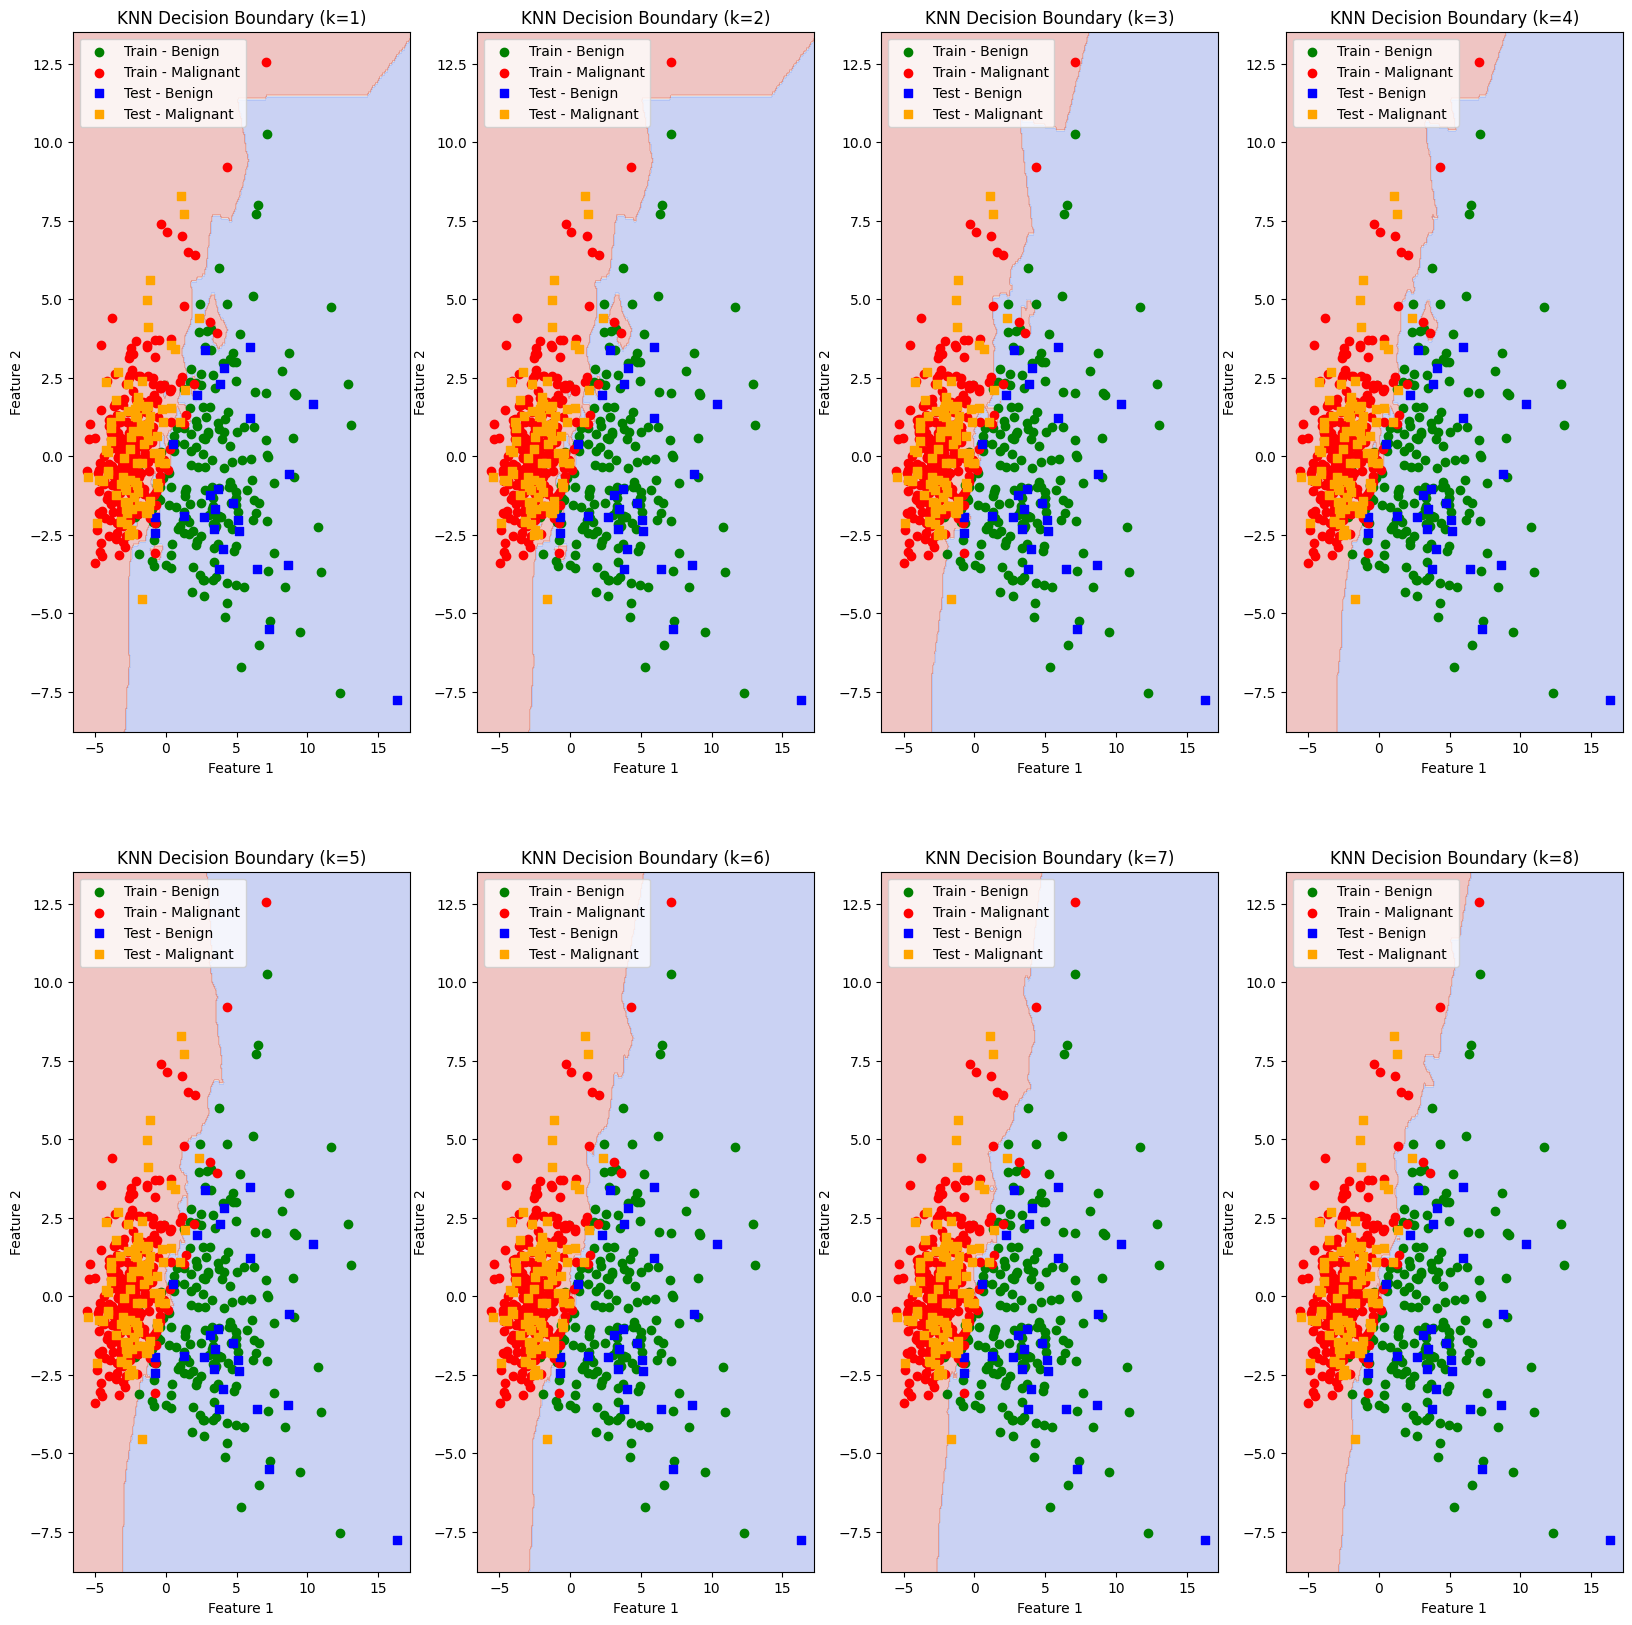

In [16]:
k = 1
fig, ax = plt.subplots(2, 4, figsize=(20, 20))
for n in range(2):
    for i in range(4):
        
        y_test_pred = knn(X_train, y_train, X_test, k)

        # Calculate accuracy
        accuracy = np.mean(y_test_pred == y_test)
        print(f"For k = {k}, Test Set Accuracy: {accuracy * 100:.2f}%")

        # Plot decision boundary by predicting on a grid
        x_min, x_max = transformed_data[:, 0].min() - 1, transformed_data[:, 0].max() + 1
        y_min, y_max = transformed_data[:, 1].min() - 1, transformed_data[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
        grid_points = np.c_[xx.ravel(), yy.ravel()]
        Z = knn(X_train, y_train, grid_points, k)
        Z = np.array(Z).reshape(xx.shape)

        # Plot decision boundary
        ax[n, i].contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')

        # Plot the training data (circles)
        ax[n, i].scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], color='green', marker='o',
                    label='Train - Benign')
        ax[n, i].scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], color='red', marker='o',
                    label='Train - Malignant')

        # Plot the testing data (rectangles)
        ax[n, i].scatter(X_test[y_test == 0, 0], X_test[y_test == 0, 1], color='blue', marker='s', label='Test - Benign')
        ax[n, i].scatter(X_test[y_test == 1, 0], X_test[y_test == 1, 1], color='orange', marker='s',
                    label='Test - Malignant')

        ax[n, i].set_xlabel('Feature 1')
        ax[n, i].set_ylabel('Feature 2')
        ax[n, i].set_title(f'KNN Decision Boundary (k={k})')
        ax[n, i].legend()
        k += 1

plt.show()

# **Conlusion:**

#### **Choice of k**:

The value of k significantly impacts the performance of the KNN algorithm. A small k (e.g., k=1) might lead to overfitting, capturing noise in the data. A larger k smooths the decision boundary but can lead to underfitting. Hence, it's crucial to experiment with different k values to find the optimal one for a given dataset.

#### **Pros of KNN**:

* Simplicity: Easy to understand and implement.
* Non-parametric: No assumptions about data distribution.
* Versatility: Can be applied to both classification and regression tasks.

#### **Cons of KNN**:

* Computationally expensive: KNN requires computing distances to all training points for each test point, making it slow for large datasets.
* Memory-intensive: Requires storing the entire dataset, which can be problematic for large datasets.
* Sensitive to irrelevant features: Performance can degrade if irrelevant features are not removed. Standardization and feature selection are essential.
* Choosing the right value for k, along with proper preprocessing (such as standardization and dimensionality reduction), is critical for achieving good performance with KNN.